In [1]:
import pandas as pd
import seaborn as sb
import joblib
import truvari
import warnings
import matplotlib.pyplot as plt

import glob

In [2]:
data = pd.read_csv("hypo_vaf.txt")

In [7]:
data.dtypes

vaf    float64
dtype: object

/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, "Uniform Distribution of Genotypes' VAF")]

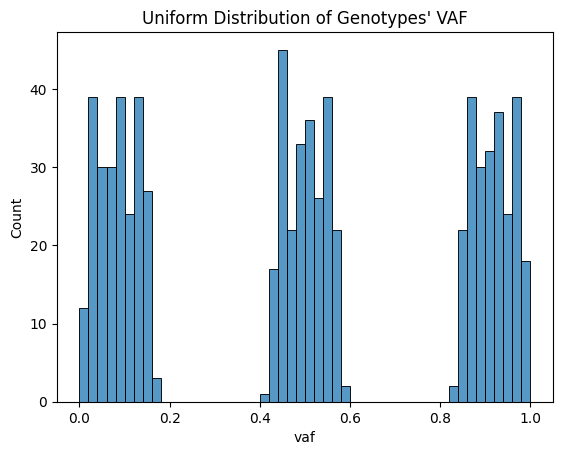

In [12]:
p = sb.histplot(data=data, x='vaf', binwidth=0.02)
p.set(title="Uniform Distribution of Genotypes' VAF")

# Assembly Stats

In [13]:
data = pd.read_csv("asm_stats/Y1_assemblies_v2_genbank_QC.csv")

In [15]:
samps = "HG00438,HG002,HG02257,HG02486,HG02622,HG005".split(',')

data = data[data['genbank_qc_sample_id_id'].isin(samps)]

In [28]:
data

,genbank_qc_sample_id_id,mat_num_contigs,mat_total_len,mat_N50,mat_L50,pat_num_contigs,pat_total_len,pat_N50,pat_L50,mat_full_sgl,...,mat_frag,pat_full_sgl,pat_full_dup,pat_frag,mat_switch_err_rate,mat_hamming_err_rate,mat_qv,pat_switch_err_rate,pat_hamming_err_rate,pat_qv
0,HG002,445,3060609068,81875417,14,610,2958633312,84969781,14,34665,...,4,34690,145,6,0.92%,0.79%,52.909,0.83%,1.38%,53.775
1,HG00438,258,3035735720,54936949,19,276,3025118465,48061544,20,34620,...,10,34727,131,9,0.97%,1.03%,52.837,0.95%,0.88%,52.845
2,HG005,503,3029694013,69736411,17,682,2937775295,58303677,17,34718,...,9,34667,129,9,0.68%,0.57%,54.092,0.28%,0.21%,54.194
26,HG02257,292,3031071346,59044574,17,306,3042496887,57982120,18,34589,...,11,34506,182,11,0.63%,1.05%,54.783,0.68%,0.60%,54.482
27,HG02486,283,3030662429,55069743,17,342,2930935689,58491195,16,34627,...,10,34410,256,13,0.58%,0.41%,Not_Calc,0.39%,0.47%,Not_Calc
30,HG02622,292,3046105980,60041455,17,270,3043426064,51206351,21,34517,...,7,34509,253,5,0.67%,0.71%,54.917,0.69%,0.72%,54.738


[Text(0.5, 1.0, 'HPRC MIMS Total Length')]

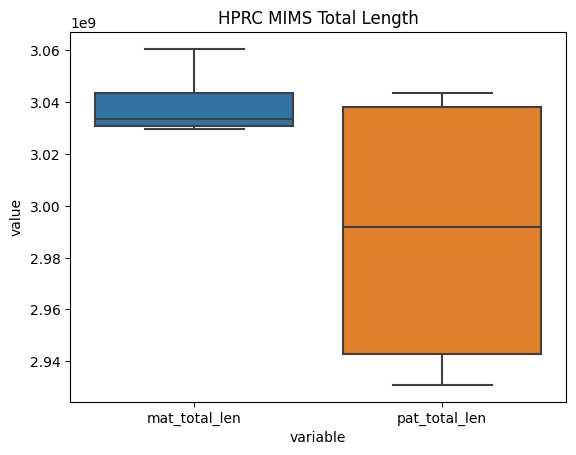

In [29]:
view = data.melt(id_vars='genbank_qc_sample_id_id', value_vars=['mat_total_len', 'pat_total_len'])
p = sb.boxplot(data=view, y='value', x='variable')
p.set(title="HPRC MIMS Total Length")

[Text(0.5, 1.0, 'HPRC MIMS N50')]

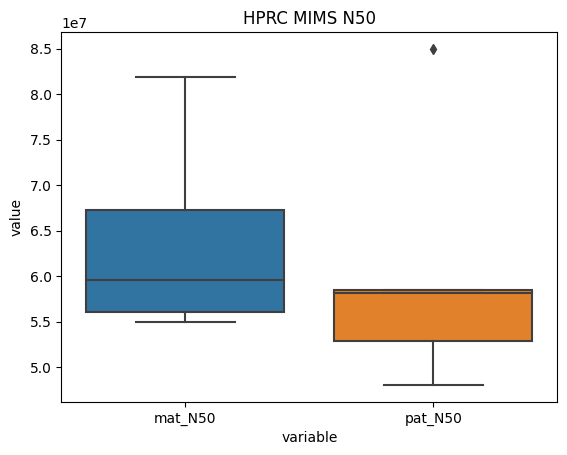

In [27]:
view = data.melt(id_vars='genbank_qc_sample_id_id', value_vars=['mat_N50', 'pat_N50'])
p = sb.boxplot(data=view, y='value', x='variable')
p.set(title="HPRC MIMS N50")

[Text(0.5, 1.0, 'HPRC MIMS Num Contigs')]

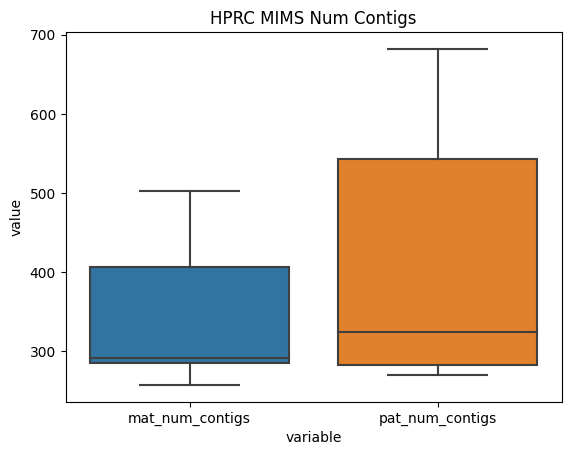

In [26]:
view = data.melt(id_vars='genbank_qc_sample_id_id', value_vars=['mat_num_contigs', 'pat_num_contigs'])
p = sb.boxplot(data=view, y='value', x='variable')
p.set(title="HPRC MIMS Num Contigs")

# Per-Hap alignments



In [32]:
data = joblib.load("asm_stats/covstats.jl")

[Text(0.5, 1.0, 'Number of alignments per-haplotype')]

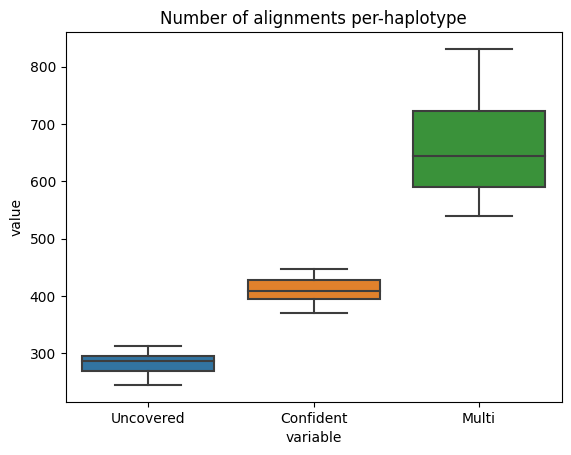

In [44]:
view = pd.DataFrame(data[0]).T.reset_index().melt(id_vars=['index'])
p = sb.boxplot(data=view, x="variable", y="value")
p.set(title="Number of alignments per-haplotype")

In [57]:
2617765246 / (3088269832-156040895-57227415)

0.9105265600621133

[Text(0.5, 1.0, 'Covered reference bases per-haplotype')]

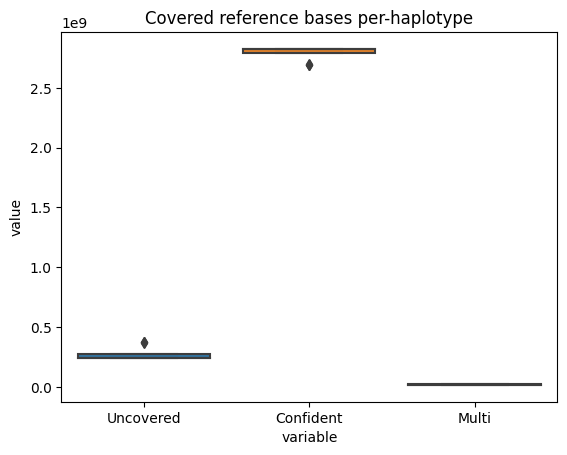

In [45]:
view = pd.DataFrame(data[1]).T.reset_index().melt(id_vars=['index'])
p = sb.boxplot(data=view, x="variable", y="value")
p.set(title="Covered reference bases per-haplotype")

In [53]:
view.groupby('variable')['value'].describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
Confident,12,2790797780,57367113,2693370929,2787542478,2821907530,2823808427,2825734225
Multi,12,20921272,3266823,16448073,18741815,19771061,23410302,27058045
Uncovered,12,276550778,56946268,243398643,244768155,245366005,277281071,371612858


In [ ]:
# Number of Variants in VCF

In [58]:
data = pd.read_csv("asm_stats/summary.smaht.single.nophab.txt.gz", sep='\t', names=['size', 'VAF', 'AC', 'AF'])

In [59]:
import truvari

In [61]:
data['szbin'] = data['size'].apply(lambda x: truvari.get_sizebin(x))



In [64]:
def foo(x):
    if x < 0:
        return 'DEL'
    if x > 0:
        return 'INS'
    return 'SNP'
data['var_type'] = data['size'].apply(lambda x: foo(x))

In [73]:
truvari.SZBINS

['SNP',
 '[1,5)',
 '[5,10)',
 '[10,15)',
 '[15,20)',
 '[20,30)',
 '[30,40)',
 '[40,50)',
 '[50,100)',
 '[100,200)',
 '[200,300)',
 '[300,400)',
 '[400,600)',
 '[600,800)',
 '[800,1k)',
 '[1k,2.5k)',
 '[2.5k,5k)',
 '>=5k']

In [75]:
data.groupby(['var_type'])['szbin'].value_counts().unstack().T.loc[truvari.SZBINS]

var_type,DEL,INS,SNP
szbin,,,
SNP,NaN,NaN,9256286.0
"[1,5)",1170091.0,1287064.0,NaN
"[5,10)",176441.0,189902.0,NaN
"[10,15)",81476.0,90169.0,NaN
"[15,20)",34688.0,41090.0,NaN
"[20,30)",36143.0,46866.0,NaN
"[30,40)",14128.0,19424.0,NaN
"[40,50)",7398.0,9847.0,NaN
"[50,100)",13500.0,19860.0,NaN


/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

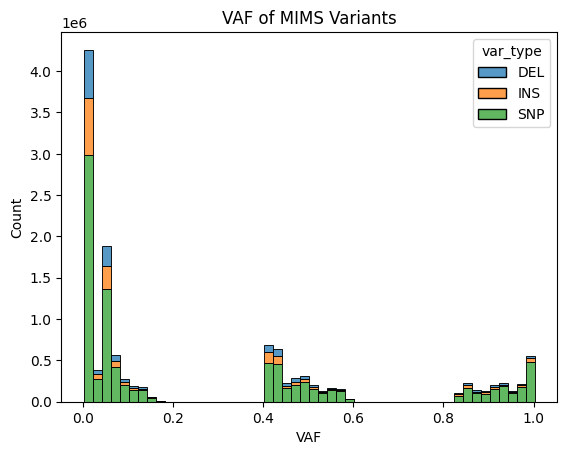

In [99]:
p = sb.histplot(data=data, x="VAF", binwidth=0.02, hue='var_type', multiple='stack', hue_order=['DEL', 'INS', 'SNP'])
_ = p.set(title="VAF of MIMS Variants")

/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

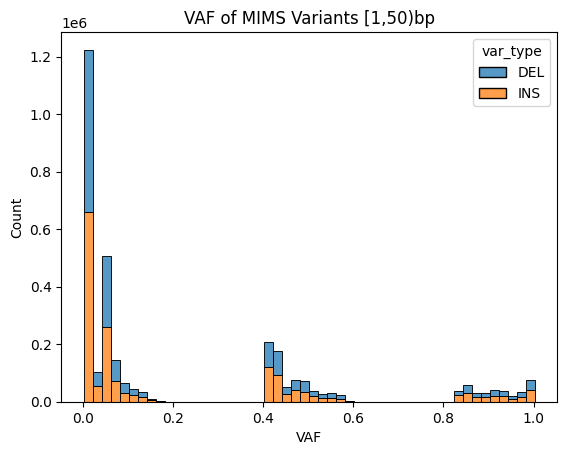

In [97]:
p = sb.histplot(data=data[data['size'].abs().between(1, 50)], x="VAF", binwidth=0.02, hue='var_type', hue_order=['DEL', 'INS'], multiple='stack')
_ = p.set(title="VAF of MIMS Variants [1,50)bp")

/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

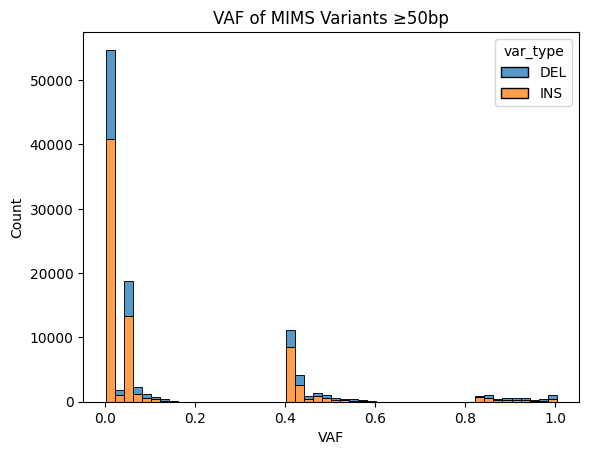

In [100]:
p = sb.histplot(data=data[data['size'].abs() >= 50], x="VAF", binwidth=0.02, hue='var_type', hue_order=['DEL', 'INS'], multiple='stack')
_ = p.set(title="VAF of MIMS Variants ≥50bp")

/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

<Axes: xlabel='VAF', ylabel='Count'>

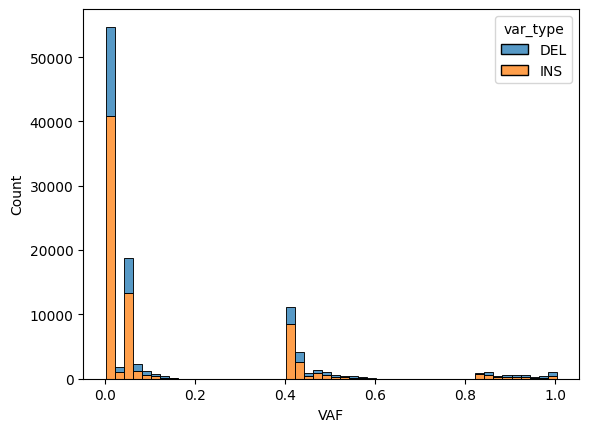

In [94]:
sb.histplot(data=data[data['size'].abs() >= 50], x="VAF", binwidth=0.02, hue='var_type', hue_order=['DEL', 'INS'], multiple='stack')

/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

<Axes: xlabel='VAF', ylabel='Count'>

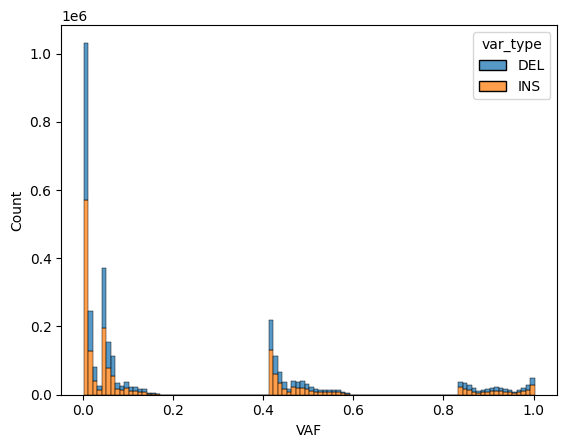

In [91]:
sb.histplot(data=data[data['size'].abs() >= 50  & (data['AC'] != 1)], x="VAF", binwidth=0.01, hue='var_type', hue_order=['DEL', 'INS'], multiple='stack')

In [57]:
for name in ['mn', 'mp', 'sn', 'sp']:
    rows = []
    fh = truvari.opt_gz_open(f"{name}.txt.gz")
    for line in fh:
        data = line.strip().split('\t')
        l = int(data[2])
        for j in data[0].split(','):
            rows.append([float(j), data[1], l])
    data = pd.DataFrame(rows, columns=["VAF", "type", "length"])
    joblib.dump(data, f"{name}.jl")

In [7]:
data[data['length'] >= 50]['type'].value_counts()

type
I      93374
D      55437
UNK     7476
Name: count, dtype: int64

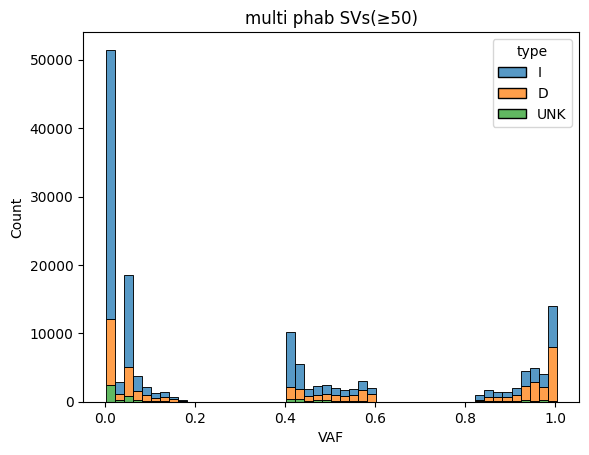

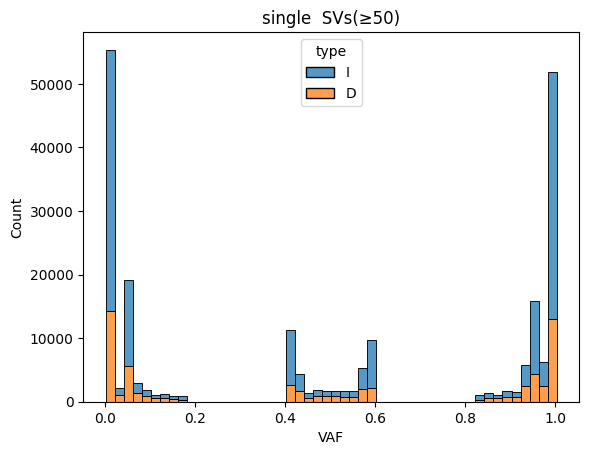

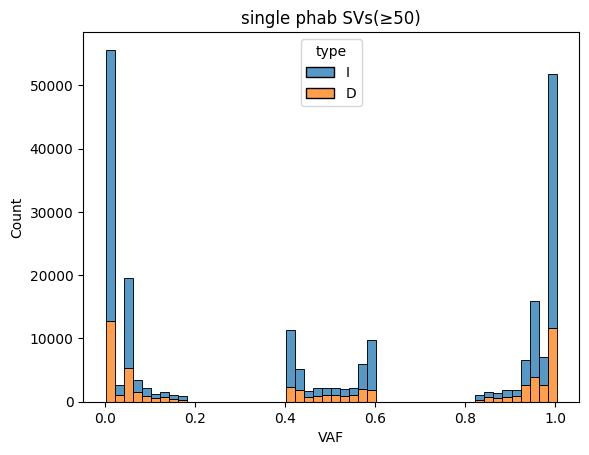

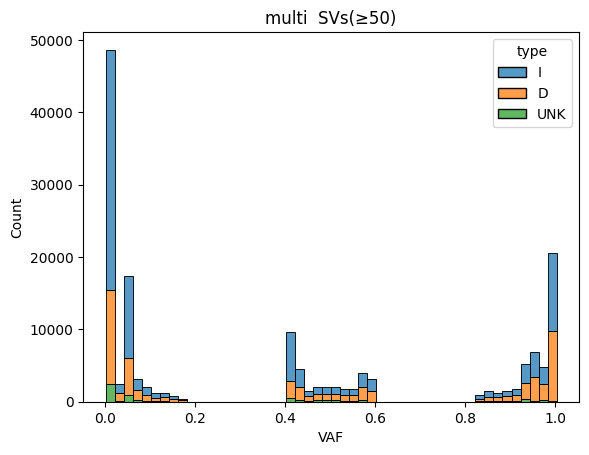

In [8]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for fn in glob.glob("*.jl"):
        data = joblib.load(fn)
        keep = (data['length'] >= 50) & (data['VAF'] != 0)
        p = sb.histplot(data=data[keep], x="VAF", hue="type", multiple='stack', binwidth=0.02)
        name = "SVs(≥50)"
        name = (' phab ' if fn[1] == 'p' else '  ') + name
        name = ('multi' if fn[0] == 'm' else 'single') + name
        p.set(title=name)
        plt.show()

/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

<Axes: xlabel='VAF', ylabel='Count'>

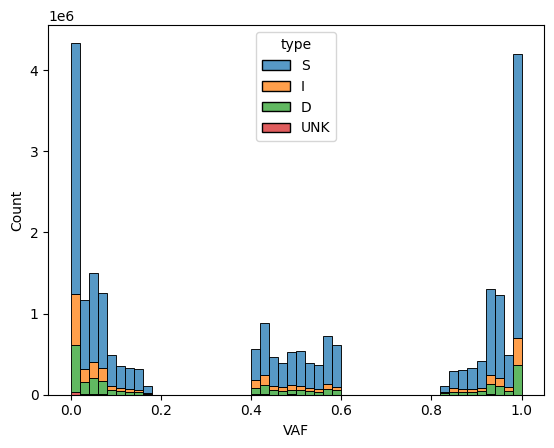

/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


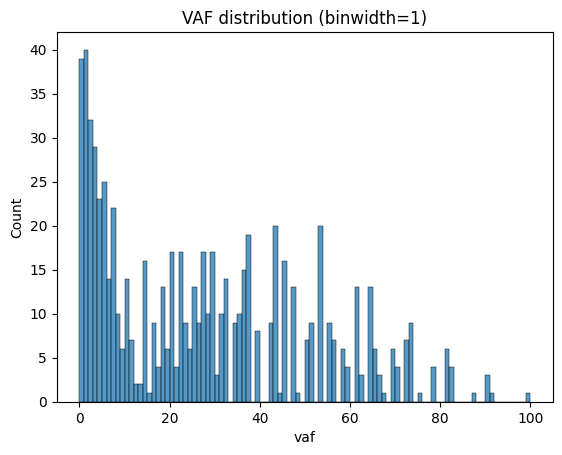

In [18]:
p = sb.histplot(data=data, x='vaf', binwidth=1)
_ = p.set(title="VAF distribution (binwidth=1)") 

In [28]:
PCTs = [data['vaf'].between(0, 1, inclusive='left').sum(),
        data['vaf'].between(1, 5, inclusive='left').sum(),
        data['vaf'].between(5, 10, inclusive='left').sum(),
        data['vaf'].between(10, 20, inclusive='left').sum(),
        data['vaf'].between(20, 50, inclusive='left').sum(),
        data['vaf'].between(50, 100, inclusive='left').sum()]
LABELs = ["[0,1)", "[1,5)", "[5,10)", "[10,20)", "[20,50)", "[50,100)"]

parts = pd.DataFrame([_ for _ in zip(PCTs, LABELs)], columns=["SiteCnt", "VAF"])

In [35]:
parts["SitePct"] = parts["SiteCnt"] / len(data) * 100

In [42]:
parts

,SiteCnt,VAF,SitePct
0,39,"[0,1)",5.349794
1,124,"[1,5)",17.009602
2,77,"[5,10)",10.562414
3,74,"[10,20)",10.150892
4,267,"[20,50)",36.625514
5,147,"[50,100)",20.164609


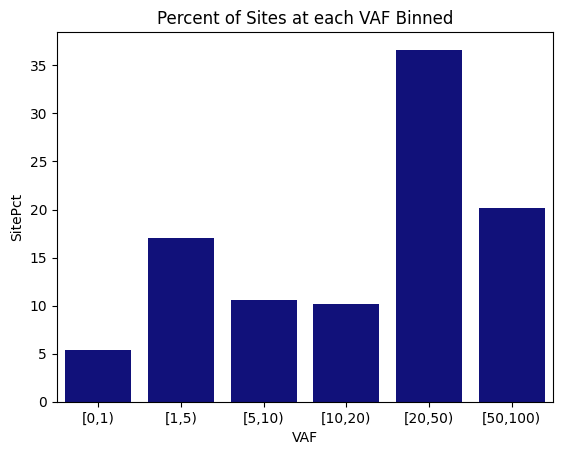

In [41]:
import matplotlib.pyplot as plt
p = sb.barplot(data=parts, x="VAF", y="SitePct", color='darkblue')
_ = p.set(title="Percent of Sites at each VAF Binned")